## Chapter 3. 에지 검출
---

In [16]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

1. 다음 1차원 디지털 영상에 대해 답하시오.

In [6]:
arr = [157, 189, 206, 216, 212, 136, 114, 92, 83, 97, 110, 108, 100, 98, 97, 101]

1) [그림 3-2(b)]의 과정을 수행하시오. 이진화 과정은 임계값을 50으로 했을 때와 20으로 했을 때를 구별하여 제시하시오.  
ans) 임계값을 20으로 설정했을 때 배열의 첫번째에서 엣지가 잡힌다. 50으로 설정했을 경우, 임계값을 넘는 값이 없어 전부 0 처리된다.

In [9]:
## 그림 3-2(b)는 1차미분이다. mask로 표현하면 [-1,1]이다. 미분값을 구한 후, 임계값 처리를 하면된다.

derivatives = [-100 for _ in range(len(arr))]
for i in range(len(arr)-1) :
    derivatives[i] = arr[i] * (-1) + arr[i+1] * 1
print(derivatives) ## 마지막 값은 무시

# 임계값이 50일 때
thr = 50
thr_50 = [d if thr <= d else 0  for d in derivatives]
thr = 20
thr_20 = [d if thr <= d else 0  for d in derivatives]

print(thr_50)
print(thr_20)

[32, 17, 10, -4, -76, -22, -22, -9, 14, 13, -2, -8, -2, -1, 4, -100]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


2. [그림 3-7]의 영상에서 (5,4)에 있는 화소에 대해 dy와 dx, 에지 강도와 그레디언트 방향, 에지 방향을 계산하시오.

In [25]:
# (5,4) 화소의 3x3 영역만 살펴보면

arr = np.array([[1,0,0], 
                [3,4,4], 
                [0,1,3]])

y_mask = np.array([[-1,-2,-1],
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

x_mask = np.array([[-1, 0, 1],
                   [-2, 0, 2], 
                   [-1, 0, 1]])

dy = np.sum(arr * y_mask)
dx = np.sum(arr * x_mask)

print(f'dy : {dy}, dx : {dx}')

gradient = np.sqrt(dy**2 + dx**2)
print(f'gradient : {gradient}')

print(f'edge direction : {math.degrees(math.atan(dy/dx) * np.pi)}\'')

dy : 4, dx : 4
gradient : 5.656854249492381
edge direction : 141.3716694115407'


3. 다음 영상에는 밝은 배경에 어두운 물체가 놓여있다. a~e로 표시된 다섯 개 변에서의 에지 반응에 답하시오. b가 x축과 이루는 내각은 8, c가 x축과 이루는 내각은 45이다. 표의 각 열의 괄호 속에 있는 기호 중 하나로 답하시오.  
ans) 교재에는 표기를 했으나, 그림을 그리거나 표기를 일일이 적기에는 무리가 있어, 이 문제의 의도만 적는다. 그레디언트의 방향은 항상 **어두운 쪽에서 밝은 쪽**으로 향하고, 에지의 방향은 그레디언트의 시계방향으로 90도를 이룬다.

4. [예제 3-1]을 C 언어로 구현한다고 했을 때 dy와 dx, 식 (3.6)의 에지 강도와 그레디언트 방향, 8-방향으로 양자화된 그레디언트 방향과 에지 방향의 여섯 가지 맵 각각에 대해 아래 데이터 형 중에서 어떤 것이 가장 적절한지 답하시오.  
ans)   
dy, dx : 0-255 사이 값들의 차이를 가지므로, signed int  
gradient magnitude : 항상 +이므로 unsigned double  
edge direction : signed double  


5. 원래 SPTA 알고리즘은 다음과 같은 굵은 패턴을 두께가 1인 패턴으로 세선화해준다. 원래 SPTA 알고리즘을 제시하시오.

6. 원을 검출하기 위한 허프 변환 알고리즘을 [알고리즘 3-7]과 같은 형식으로 제시하시오.

[[[128  76  35]]]


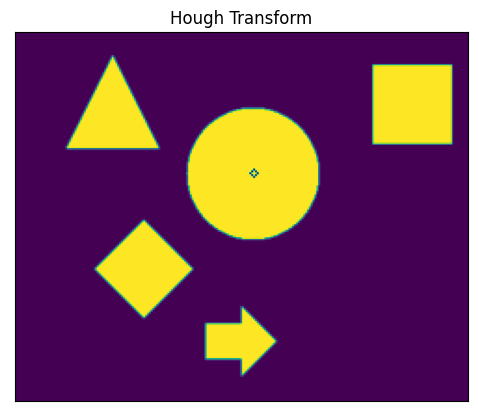

In [36]:
img = cv2.imread('../img/figures.png', cv2.IMREAD_GRAYSCALE)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
print(circles) ## [[[y, x, r], ]]

for i in circles[0,:]:
    # draw the center of the circle
    cv2.circle(img,(i[0],i[1]),2,0)

plt.imshow(img)
plt.title('Hough Transform'), plt.xticks([]), plt.yticks([])
plt.show()
